Read in packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import glob
import os
import xarray as xr
import rioxarray 
import random
from MightyMosaic import MightyMosaic
from mpl_toolkits.axes_grid1 import make_axes_locatable


First plot dNBR and y from the actualy tif file

/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_training_85/median_26.tif


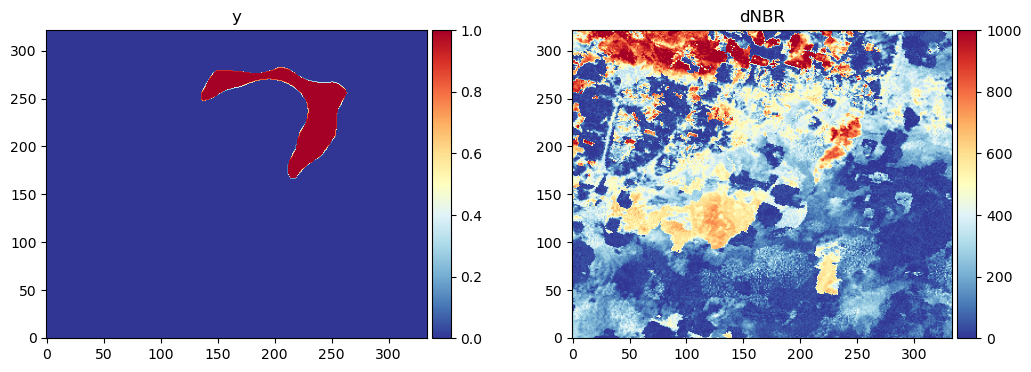

In [132]:
#path to tif files for mtbs
in_path = '/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs'

#path to tif files for nbac
# in_path = '/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj'

in_path = '/explore/nobackup/people/spotter5/cnn_mapping/Russia/anna_training_85'

#randomly select a file
all_files = glob.glob(os.path.join(in_path, '*.tif'))

f = random.choice(all_files)


#why does this have no data in y or dnbr? I should remove it if both y and dnbr is all 0 I think
#/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs/median_176.tif
#/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs/median_960.tif

# f = 'median_1131.tif'
# f = 'median_6169.tif'

print(f)

img = rioxarray.open_rasterio(os.path.join(in_path, f)).to_numpy()


#dnbr
dnbr = img[0, :, :] #for non russian first index is 6

#y
y = img[-1, :, :]

#plot side by side
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 4))

#plot y
im = ax[0].imshow(y, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin= 0, vmax=1)
# ax[0,0].title.set_text('Fire')
ax[0].title.set_text('y')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

#plot2
# im2 = ax[0,1].imshow(in_mat[:, :, 0]/1000, origin = 'lower', cmap = 'Blues', aspect= 'auto')
im2 = ax[1].imshow(dnbr, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=-0, vmax=1000)
# ax[0,1].title.set_text('B1-Ultra Blue')
ax[1].title.set_text('dNBR')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

Check what it looks like for the new data that is buffered larger

Check new dimensions on file from mosaic

median_6169.tif


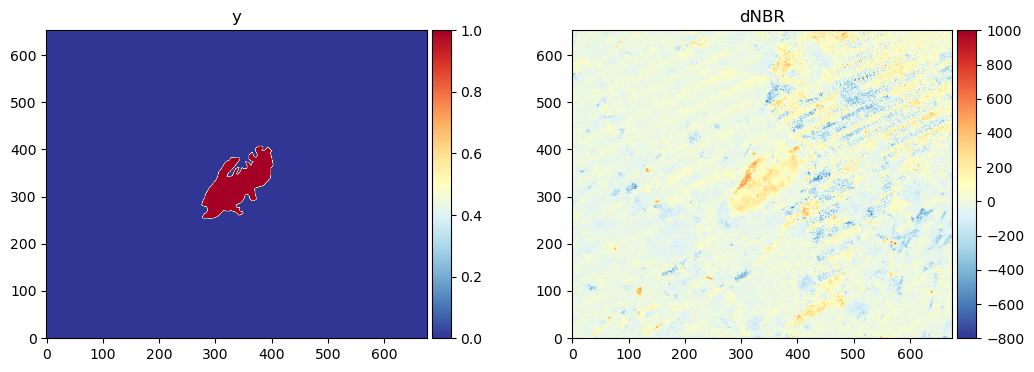

In [ ]:
#path to tif files for mtbs
in_path = '/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs'

#path to tif files for nbac
in_path = '/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/nbac_larger'

#randomly select a file
all_files = glob.glob(os.path.join(in_path, '*.tif'))

f = random.choice(all_files)


#why does this have no data in y or dnbr? I should remove it if both y and dnbr is all 0 I think
#/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs/median_176.tif
#/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs/median_960.tif

# f = 'median_1131.tif'
f = 'median_6169.tif'

print(f)

img = rioxarray.open_rasterio(os.path.join(in_path, f)).to_numpy()


#dnbr
dnbr = img[0, :, :]

#y
y = img[-1, :, :]

#plot side by side
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 4))

#plot y
im = ax[0].imshow(y, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin= 0, vmax=1)
# ax[0,0].title.set_text('Fire')
ax[0].title.set_text('y')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

#plot2
# im2 = ax[0,1].imshow(in_mat[:, :, 0]/1000, origin = 'lower', cmap = 'Blues', aspect= 'auto')
im2 = ax[1].imshow(dnbr, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=-800, vmax=1000)
# ax[0,1].title.set_text('B1-Ultra Blue')
ax[1].title.set_text('dNBR')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

And now check if we mosaic

(6, 6, 128, 128, 4)


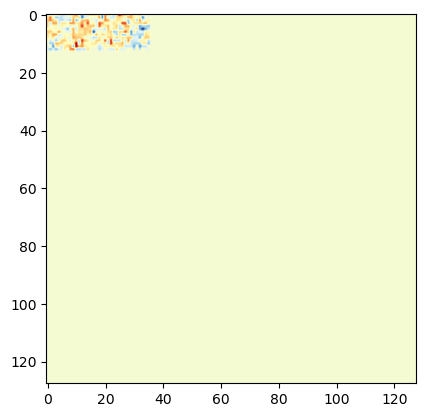

In [16]:
size = 128



#now turn in mat to numpy, and in mtbs to numpy
in_mat = img.astype(float)

#convert to band last
in_mat = np.moveaxis(in_mat, 0, 2) 


#mosaic
mosaic = MightyMosaic.from_array(in_mat, (size,size), overlap_factor=1) 

#so there are 12 * 9 new 128x128 matrices
print(mosaic.shape)

#0, 8 is bad, 1, 8 is bad, 2, 8 is bad all the way to 0, 11.  This is the right side of the image
#11, 0 is bad, 11, 1 is bad, 11, 2 is bad all the way to 11, 8, this is the last row or bottom of the image

#so it seems the image is being extended to the bottom and right and we need to get the dimensions of the mosaic
#and then omit anytime there is a 11 in the first dimension or a 8 in the second dimension
t = mosaic[5, 5, :, :, 0]

plt.imshow(t, cmap = 'RdYlBu_r')

# #slice off the last dimensions
# mosaic2 = mosaic[:-1, :-1, :, :, :]

# print(mosaic2.shape)

# plt.imshow(mosaic2[9, 6, :, :, 6])


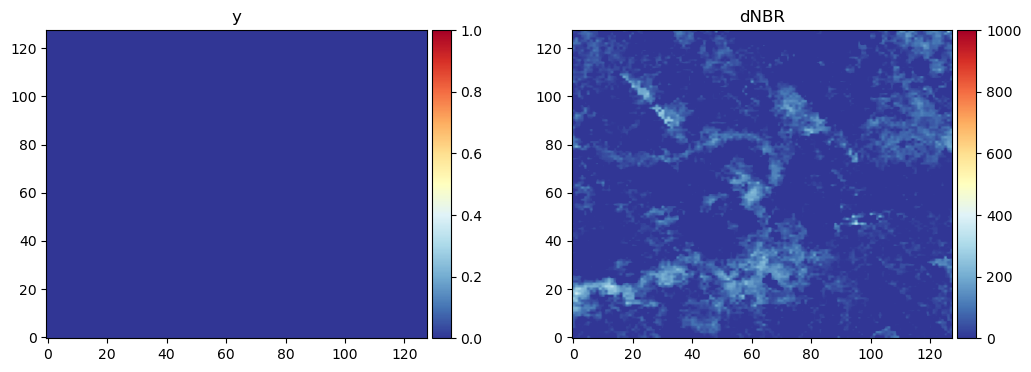

In [260]:
in_path = '/explore/nobackup/people/spotter5/cnn_mapping/Russia/l8_sent_collection2_proj_mtbs_unburned_subs_0_128'


#randomly select a file
all_files = glob.glob(os.path.join(in_path, '*.npy'))

f = random.choice(all_files)

img = np.load(os.path.join(in_path, f))

dnbr = img[:, :, 6]
y  = img[:, :, -1]
# plt.imshow(img[:, :, 6], cmap = 'RdYlBu_r')
#plot side by side
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 4))

#plot y
im = ax[0].imshow(y, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin= 0, vmax=1)
# ax[0,0].title.set_text('Fire')
ax[0].title.set_text('y')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

#plot2
# im2 = ax[0,1].imshow(in_mat[:, :, 0]/1000, origin = 'lower', cmap = 'Blues', aspect= 'auto')
im2 = ax[1].imshow(dnbr, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=-0, vmax=1000)
# ax[0,1].title.set_text('B1-Ultra Blue')
ax[1].title.set_text('dNBR')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

For that same file plot the numpy arrays to ensure the mighty mosaic part makes sense too

/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_subs_0_final_128/1_1_7447.npy


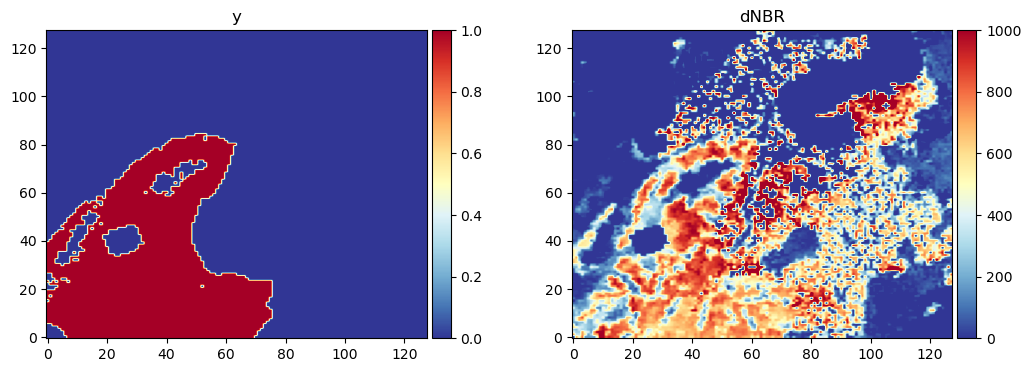

In [132]:
#id of f
f_id = f.split('_')[-1].replace('.tif', '')

#get all numpy files which contain f for mtbs
# numpy_path = '/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs_subs_0_128'

numpy_path = '/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_subs_0_128'
# numpy_path = '/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_subs_0_final_128'


#all numpy arrays
all_npy = glob.glob(os.path.join(numpy_path, "*.npy"))

#only get it if the third number is equal to f_id
all_npy = [i for i in all_npy if i.split('/')[-1].split('_')[-1].replace('.npy', '') == f_id]

#random numpy from the larger fire
rand_npy = random.choice(all_npy)

print(rand_npy)

#bad ids
#/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs_subs_0_128/6_8_1131.npy
#/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/l8_sent_collection2_proj_mtbs_subs_0_128/11_3_1131.npy
#
#

rand_npy = np.load(rand_npy)


# #dnbr
dnbr = rand_npy[:, :, 6]

# #y
y = rand_npy[:, :, -1]

#plot side by side
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 4))

#plot y
im = ax[0].imshow(y, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin= 0, vmax=1)
# ax[0,0].title.set_text('Fire')
ax[0].title.set_text('y')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

#plot2
# im2 = ax[0,1].imshow(in_mat[:, :, 0]/1000, origin = 'lower', cmap = 'Blues', aspect= 'auto')
im2 = ax[1].imshow(dnbr, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=-0, vmax=1000)
# ax[0,1].title.set_text('B1-Ultra Blue')
ax[1].title.set_text('dNBR')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.subplots_adjust(wspace=0.3, hspace=0.4)




Loop through the numpy datasets and plot as 5x2, first one is the full image, then all bands but b1 and the dependent variablle

[0. 1.]
253_1966.npy


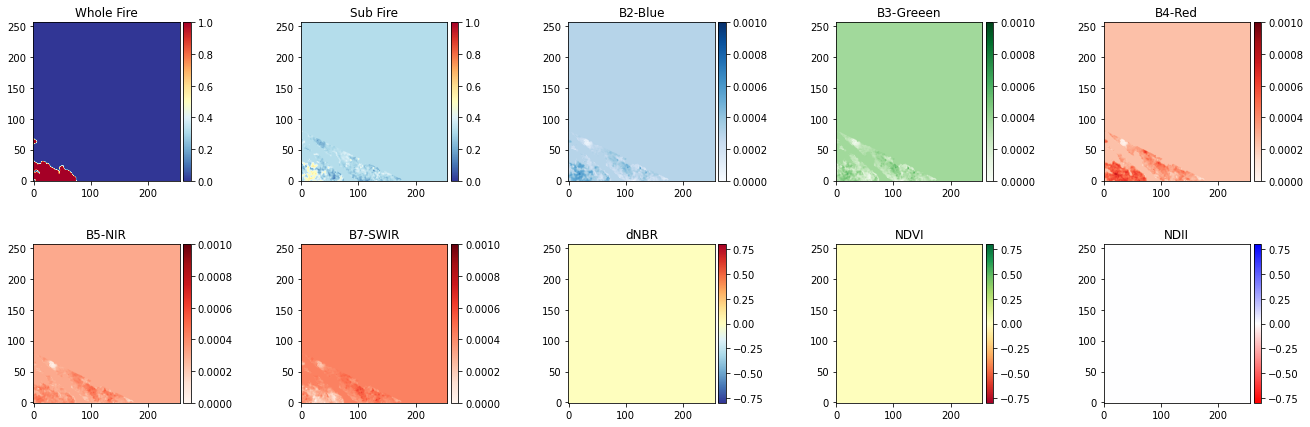

In [25]:
tif_path = "/att/nobackup/spotter5/cnn_mapping/nbac_training/ak_validation_data"
tif_path2 =  "/att/nobackup/spotter5/cnn_mapping/nbac_training/ak_validation_labels"
tif_files = [os.path.basename(x) for x in glob.glob(os.path.join(tif_path, "*.npy"))]
for f in tif_files:
    
    x = np.load(os.path.join("/att/nobackup/spotter5/cnn_mapping/nbac_training/ak_validation_data", f))[:, :, ]
    x = normalize(x, axis=(0,1))
    y = np.load(os.path.join(tif_path2, f))
    
    fig, ax = plt.subplots(ncols = 5, nrows = 2,figsize = (22, 7))
                      
    #plot 1
    im = ax[0,0].imshow(y, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=-0, vmax=1)
    # ax[0,0].title.set_text('Fire')
    ax[0,0].title.set_text('Whole Fire')

    divider = make_axes_locatable(ax[0,0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    #plot2
    # im2 = ax[0,1].imshow(in_mat[:, :, 0]/1000, origin = 'lower', cmap = 'Blues', aspect= 'auto')
    im2 = ax[0,1].imshow(x[:, :, 0], origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=-0, vmax=1)
    # ax[0,1].title.set_text('B1-Ultra Blue')
    ax[0,1].title.set_text('Sub Fire')
    divider = make_axes_locatable(ax[0,1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')

    #plot3
    im3 = ax[0,2].imshow(x[:, :, 1]/1000, origin = 'lower', cmap = 'Blues', aspect= 'auto')
    ax[0,2].title.set_text('B2-Blue')
    divider = make_axes_locatable(ax[0,2])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical')

    #plot4
    im4 = ax[0,3].imshow(x[:, :, 2]/1000, origin = 'lower', cmap = 'Greens', aspect= 'auto')
    ax[0,3].title.set_text('B3-Greeen')
    divider = make_axes_locatable(ax[0,3])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im4, cax=cax, orientation='vertical')

    #plot4
    im5 = ax[0,4].imshow(x[:, :, 3]/1000, origin = 'lower', cmap = 'Reds', aspect= 'auto')
    ax[0,4].title.set_text('B4-Red')
    divider = make_axes_locatable(ax[0,4])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im5, cax=cax, orientation='vertical')

    #plot5
    im6 = ax[1,0].imshow(x[:, :, 4]/1000, origin = 'lower', cmap = 'Reds', aspect= 'auto')
    ax[1,0].title.set_text('B5-NIR')
    divider = make_axes_locatable(ax[1,0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical')

    #plot6
    im6 = ax[1,1].imshow(x[:, :, 5]/1000, origin = 'lower', cmap = 'Reds', aspect= 'auto')
    ax[1,1].title.set_text('B7-SWIR')
    divider = make_axes_locatable(ax[1,1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical')

    #plot7
    im6 = ax[1,2].imshow(x[:, :, 6]/1000, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=-0.8, vmax=0.8)
    ax[1,2].title.set_text('dNBR')
    divider = make_axes_locatable(ax[1,2])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical')

    #plot8
    im6 = ax[1,3].imshow(x[:, :, 7]/1000, origin = 'lower', cmap = 'RdYlGn', aspect= 'auto', vmin=-0.8, vmax=0.8)
    ax[1,3].title.set_text('NDVI')
    divider = make_axes_locatable(ax[1,3])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical')

    #plot9
    im6 = ax[1,4].imshow(x[:, :, 8]/1000, origin = 'lower', cmap = 'bwr_r', aspect= 'auto', vmin=-0.8, vmax=0.8)
    ax[1,4].title.set_text('NDII')
    divider = make_axes_locatable(ax[1,4])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical')

    plt.subplots_adjust(wspace=0.7, hspace=0.4)
    print(np.unique(y))
    print(f)
    
    break


[0 1]
2581.npy


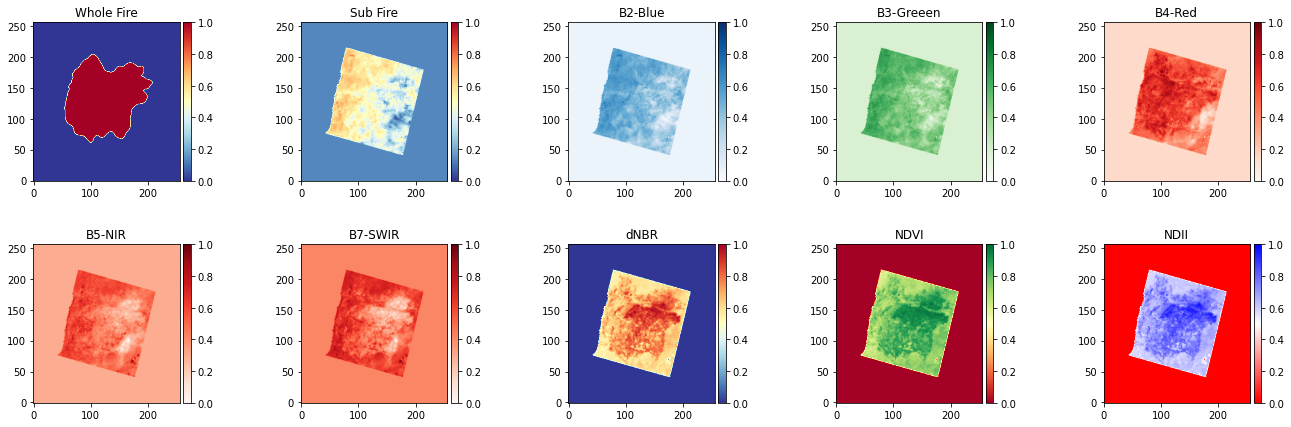

In [36]:
tif_path = "/att/nobackup/spotter5/cnn_mapping/nbac_training/ak_training_data"
tif_path2 =  "/att/nobackup/spotter5/cnn_mapping/nbac_training/ak_training_labels"
tif_files = [os.path.basename(x) for x in glob.glob(os.path.join(tif_path, "*.npy"))]
for f in tif_files:
    
    if f == '2581.npy':
    
        x = np.load(os.path.join("/att/nobackup/spotter5/cnn_mapping/nbac_training/ak_training_data", f))[:, :, ]
        
        x[x == 0] = -999
        #turn nan to 0
        x = normalize(x, axis=(0,1))
    
        x[np.isnan(x)] = 0
       
        y = np.load(os.path.join(tif_path2, f))

         #turn nan to 0
        y[np.isnan(y)] = 0

        y[y <0 ] = 0
        y[y >1 ] = 0

        y[~np.isin(y, [0,1])] = 0

        y = y.astype(int)

        fig, ax = plt.subplots(ncols = 5, nrows = 2,figsize = (22, 7))

        #plot 1
        im = ax[0,0].imshow(y, origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto', vmin=0, vmax=1)
        # ax[0,0].title.set_text('Fire')
        ax[0,0].title.set_text('Whole Fire')

        divider = make_axes_locatable(ax[0,0])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')

        #plot2
        # im2 = ax[0,1].imshow(in_mat[:, :, 0]/1000, origin = 'lower', cmap = 'Blues', aspect= 'auto')
        im2 = ax[0,1].imshow(x[:, :, 0], origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto')
        # ax[0,1].title.set_text('B1-Ultra Blue')
        ax[0,1].title.set_text('Sub Fire')
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im2, cax=cax, orientation='vertical')

        #plot3
        im3 = ax[0,2].imshow(x[:, :, 1], origin = 'lower', cmap = 'Blues', aspect= 'auto')
        ax[0,2].title.set_text('B2-Blue')
        divider = make_axes_locatable(ax[0,2])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im3, cax=cax, orientation='vertical')

        #plot4
        im4 = ax[0,3].imshow(x[:, :, 2], origin = 'lower', cmap = 'Greens', aspect= 'auto')
        ax[0,3].title.set_text('B3-Greeen')
        divider = make_axes_locatable(ax[0,3])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im4, cax=cax, orientation='vertical')

        #plot4
        im5 = ax[0,4].imshow(x[:, :, 3], origin = 'lower', cmap = 'Reds', aspect= 'auto')
        ax[0,4].title.set_text('B4-Red')
        divider = make_axes_locatable(ax[0,4])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im5, cax=cax, orientation='vertical')

        #plot5
        im6 = ax[1,0].imshow(x[:, :, 4], origin = 'lower', cmap = 'Reds', aspect= 'auto')
        ax[1,0].title.set_text('B5-NIR')
        divider = make_axes_locatable(ax[1,0])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im6, cax=cax, orientation='vertical')

        #plot6
        im6 = ax[1,1].imshow(x[:, :, 5], origin = 'lower', cmap = 'Reds', aspect= 'auto')
        ax[1,1].title.set_text('B7-SWIR')
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im6, cax=cax, orientation='vertical')

        #plot7
        im6 = ax[1,2].imshow(x[:, :, 6], origin = 'lower', cmap = 'RdYlBu_r', aspect= 'auto')
        ax[1,2].title.set_text('dNBR')
        divider = make_axes_locatable(ax[1,2])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im6, cax=cax, orientation='vertical')

        #plot8
        im6 = ax[1,3].imshow(x[:, :, 7], origin = 'lower', cmap = 'RdYlGn', aspect= 'auto')
        ax[1,3].title.set_text('NDVI')
        divider = make_axes_locatable(ax[1,3])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im6, cax=cax, orientation='vertical')

        #plot9
        im6 = ax[1,4].imshow(x[:, :, 8], origin = 'lower', cmap = 'bwr_r', aspect= 'auto')
        ax[1,4].title.set_text('NDII')
        divider = make_axes_locatable(ax[1,4])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im6, cax=cax, orientation='vertical')

        plt.subplots_adjust(wspace=0.7, hspace=0.4)
        print(np.unique(y))
        print(f)

        break

In [11]:
def is_matrix_all_zeros(matrix):
    # Convert the matrix to a NumPy array
    np_matrix = np.array(matrix)

    # Check if all elements in the array are zeros
    return np.all(np_matrix == 0)


result = is_matrix_all_zeros(img)

result

True